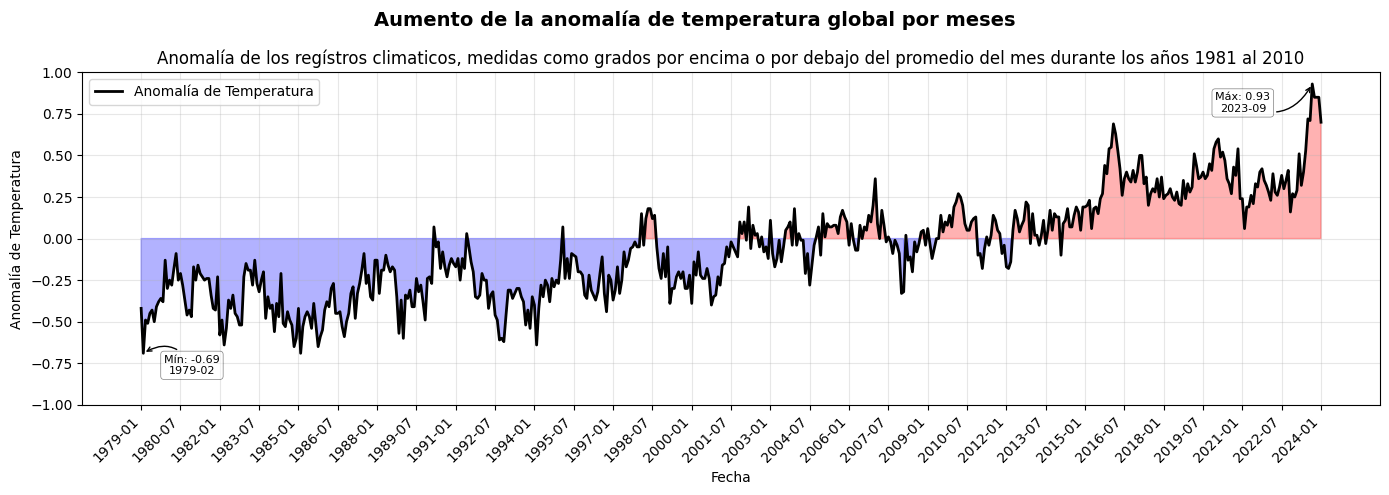

In [51]:
import pandas as pd
import matplotlib.pyplot as plt 
  
# reading CSV file 
df = pd.read_csv("el_aumento_de_la_temperatura_global_mes_a_mes.csv") 
  
meses_numeros = {
    'Enero': '01',
    'Febrero': '02',
    'Marzo': '03',
    'Abril': '04',
    'Mayo': '05',
    'Junio': '06',
    'Julio': '07',
    'Agosto': '08',
    'Septiembre': '09',
    'Octubre': '10',
    'Noviembre': '11',
    'Diciembre': '12'
}

# Aplicar el mapeo
df['mes_numero'] = df['Periodo'].map(meses_numeros)

# Concatenar las columnas año y mes (en formato numérico) y luego convertirlas en formato de fecha
df['fecha'] = df['Año'].astype(str) + '-' + df['mes_numero']

df = df.drop(['Periodo','mes_numero','Año'],axis=1)

# Ajustar el tamaño de la figura
plt.figure(figsize=(14, 5))

# Crear el gráfico de línea negra
plt.plot(df['fecha'], df['Anomalia temperatura '], color='black', linewidth=2, label='Anomalía de Temperatura')

# Rellenar el área por debajo de la línea con azul y el área por encima con rojo
plt.fill_between(df['fecha'], df['Anomalia temperatura '], where=(df['Anomalia temperatura '] >= 0), color='red', alpha=0.3)
plt.fill_between(df['fecha'], df['Anomalia temperatura '], where=(df['Anomalia temperatura '] <= 0), color='blue', alpha=0.3)

# Ajustar los límites del eje y
plt.ylim(-1, 1)

# Detalles y formato del gráfico
plt.title('Anomalía de los regístros climaticos, medidas como grados por encima o por debajo del promedio del mes durante los años 1981 al 2010')
plt.suptitle('Aumento de la anomalía de temperatura global por meses', fontsize=14, fontweight='bold')

plt.xlabel('Fecha')
plt.ylabel('Anomalía de Temperatura')

# Añadir una cuadrícula transparente
plt.grid(alpha=0.3)

# Ajustar el paso de las etiquetas del eje x
n = len(df['fecha'])
plt.xticks(df['fecha'][::int(n/30)], rotation=45, ha='right')  # Mostrar solo una fracción de las etiquetas

# Mostrar leyenda
plt.legend()

# Agregar etiquetas con los valores máximo y mínimo
max_value = df['Anomalia temperatura '].max()
min_value = df['Anomalia temperatura '].min()
max_date = df[df['Anomalia temperatura '] == max_value]['fecha'].values[0]
min_date = df[df['Anomalia temperatura '] == min_value]['fecha'].values[0]
max_value_index = df[df['fecha'] == max_date].index[0]
min_value_index = df[df['fecha'] == min_date].index[0]

plt.annotate(f'Máx: {max_value:.2f}\n{max_date}', xy=(max_value_index, max_value), xytext=(-50, -20), textcoords='offset points', ha='center', fontsize=8,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5, alpha=0.5),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.5", color='black'))

plt.annotate(f'Mín: {min_value:.2f}\n{min_date}', xy=(min_value_index, min_value), xytext=(35, -15), textcoords='offset points', ha='center', fontsize=8,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5, alpha=0.5),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.5", color='black'))

plt.tight_layout()  # Ajustar el diseño para que los elementos no se superpongan

# Mostrar el gráfico
plt.show()
